In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

In [2]:
train_df = pd.read_csv("F:/CMREC/Project/3rd Year/Semester 2/Mini Project/archive/emnist-bymerge-train.csv", header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.shape

(697932, 785)

In [4]:
x_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]
x_train.shape, y_train.shape

((697932, 784), (697932,))

In [5]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train.head()

0    24
1    36
2     5
3     6
4    35
Name: 0, dtype: int64

In [7]:
label_map = pd.read_csv("F:/CMREC/Project/3rd Year/Semester 2/Mini Project/archive/emnist-bymerge-mapping.txt", delimiter=' ', index_col=0, header=None, squeeze=True)
label_map.head()

C:\Users\Saubhik Ghosh.000\AppData\Local\Temp\ipykernel_11044\245080547.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  label_map = pd.read_csv("F:/CMREC/Project/3rd Year/Semester 2/Mini Project/archive/emnist-bymerge-mapping.txt", delimiter=' ', index_col=0, header=None, squeeze=True)


0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [8]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [9]:
sample_image = x_train.iloc[42]
sample_label = y_train.iloc[42]
sample_image.shape, sample_label

((784,), 39)

In [10]:
W = 28
H = 28

Label entry 42: e


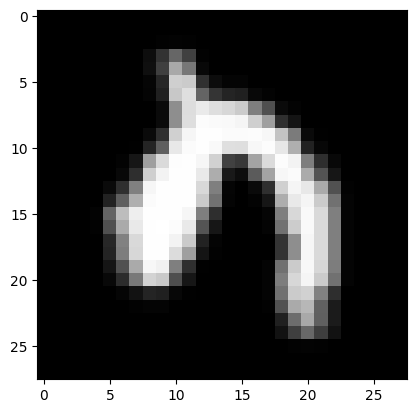

In [11]:
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()

Label entry 42: e


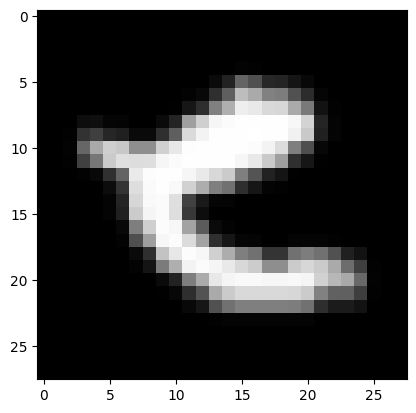

In [12]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(reshape_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

In [13]:
x_train = np.apply_along_axis(reshape_and_rotate, 1, x_train.values)
x_train.shape

(697932, 28, 28)

Label entry 42: e


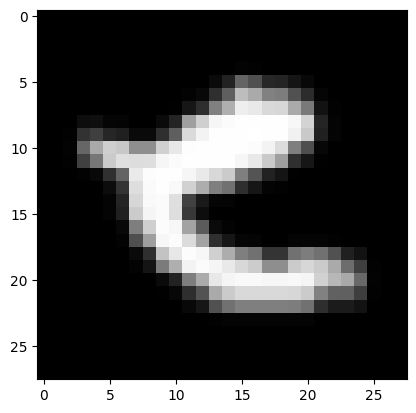

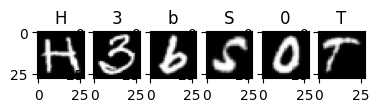

In [14]:
sample_image = x_train[42]
sample_label = y_train.iloc[42]
print("Label entry 42:", label_dictionary[sample_label])
plt.imshow(sample_image.reshape(W, H), cmap=plt.cm.gray)
plt.show()


for i in range(100, 106):
    plt.subplot(390 + (i+1))
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_train[i]])

In [15]:
x_train = x_train.astype('float32') / 255

In [16]:
number_of_classes = y_train.nunique()
number_of_classes

47

In [17]:
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_train.shape

(697932, 47)

In [18]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
x_train = x_train.reshape(-1, W, H, 1)
x_train.shape

(697932, 28, 28, 1)

In [20]:
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.1, random_state=88)

In [21]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(W, H, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(4,4), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        24624     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          27712     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [22]:
optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('model_bymerge_3convo_v2.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [23]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1,callbacks=[early_stopping, mcp_save])

Epoch 1/20
17667/17667 [==============================] - ETA: 0s - loss: 0.4511 - accuracy: 0.8466
Epoch 1: val_loss improved from inf to 0.34914, saving model to model_bymerge_3convo_v2.h5
17667/17667 [==============================] - 292s 16ms/step - loss: 0.4511 - accuracy: 0.8466 - val_loss: 0.3491 - val_accuracy: 0.8762
Epoch 2/20
17667/17667 [==============================] - ETA: 0s - loss: 0.3245 - accuracy: 0.8843
Epoch 2: val_loss improved from 0.34914 to 0.32586, saving model to model_bymerge_3convo_v2.h5
17667/17667 [==============================] - 289s 16ms/step - loss: 0.3245 - accuracy: 0.8843 - val_loss: 0.3259 - val_accuracy: 0.8848
Epoch 3/20
17664/17667 [============================>.] - ETA: 0s - loss: 0.3065 - accuracy: 0.8893
Epoch 3: val_loss improved from 0.32586 to 0.32166, saving model to model_bymerge_3convo_v2.h5
17667/17667 [==============================] - 298s 17ms/step - loss: 0.3065 - accuracy: 0.8893 - val_loss: 0.3217 - val_accuracy: 0.8873
Epoch

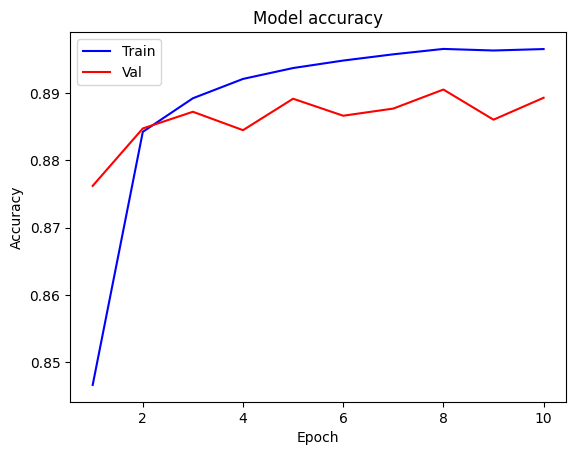

In [24]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plotgraph(epochs, acc, val_acc)

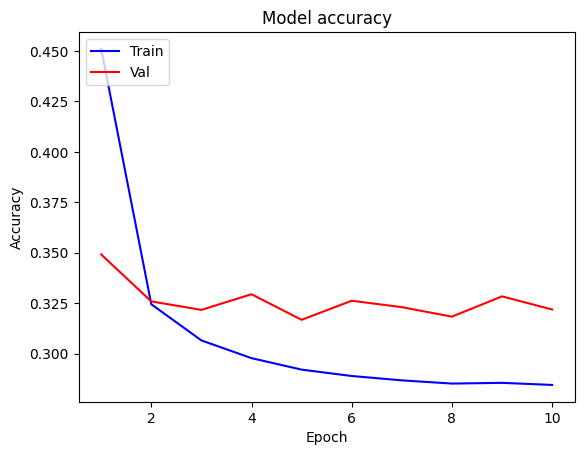

In [25]:
plotgraph(epochs, loss, val_loss)

In [26]:
model = load_model('model_bymerge_3convo_v2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        24624     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          27712     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [27]:
y_pred = model.predict(X_val)
y_pred.shape

2182/2182 [==============================] - 8s 4ms/step


(69794, 47)

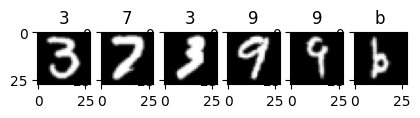

In [28]:
for i in range(10, 16):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

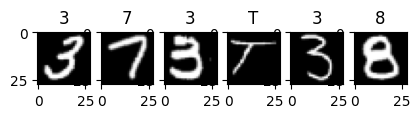

In [29]:
for i in range(42, 48):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

In [30]:
model.evaluate(X_val, y_val)

2182/2182 [==============================] - 9s 4ms/step - loss: 0.3126 - accuracy: 0.8896


[0.312643826007843, 0.8896466493606567]

In [31]:
test_df = pd.read_csv("F:/CMREC/Project/3rd Year/Semester 2/Mini Project/archive/emnist-bymerge-test.csv", header=None)
test_df.shape

(116323, 785)

In [32]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,116323.000000,116323.0,116323.0,116323.0,116323.0,116323.000000,116323.000000,116323.000000,116323.000000,116323.000000,...,116323.0,116323.0,116323.0,116323.0,116323.0,116323.0,116323.0,116323.0,116323.0,116323.0
mean,16.833361,0.0,0.0,0.0,0.0,0.001616,0.006276,0.009087,0.008786,0.006052,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,14.389015,0.0,0.0,0.0,0.0,0.283206,0.967515,1.015929,1.164424,0.993807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,28.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,46.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,158.000000,217.000000,217.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
x_test = test_df.loc[:, 1:]
y_test = test_df.loc[:, 0]

x_test.shape, y_test.shape

((116323, 784), (116323,))

In [34]:
x_test = np.apply_along_axis(reshape_and_rotate, 1, x_test.values)
y_test = np_utils.to_categorical(y_test, number_of_classes)

x_test.shape, y_test.shape

((116323, 28, 28), (116323, 47))

In [35]:
x_test = x_test.astype('float32') / 255

In [36]:
x_test = x_test.reshape(-1, W, H, 1)
x_test.shape

(116323, 28, 28, 1)

In [37]:
model.evaluate(x_test, y_test)

3636/3636 [==============================] - 14s 4ms/step - loss: 0.3132 - accuracy: 0.8898


[0.31316041946411133, 0.8898240327835083]